# 第 3 讲：插值、拟合

## Taylor 多项式

Taylor 多项式在 $x_0$ 点展开，以逼近函数 $f$.

$$P_n(x)=f(x_0)+f^\prime(x_0)(x-x_0)+\frac{f^{\prime\prime}(x_0)}{2!}(x-x_0)^2+\dots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

或写成 $$P_n(x)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$

用 $P_n(x)$ 在 $x_0$ 附近逼近函数 $f(x)$ 的**截断误差**使用余项 $R_n(x)$ 表示，它满足 

$$R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{(n+1)}$$

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

以 $f(x)=\rm{e}^{x}$ 在 $x_0=0$ 上的 Taylor 逼近为例

In [2]:
def factorial(n):
    '''
       递归地生成阶乘
       这不是一个递归的好例子，只是为方便实现
    '''
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def poly_coef_exp(n):
    '''
        生成在 x=0 处逼近指数函数 f = exp(x) 多项式的系数
        n 是多项式的阶数
    '''
    coefficients = []
    for i in range(n + 1):
        coefficients.append(1 / factorial(i))
    return coefficients

In [3]:
# 测试系数
print(poly_coef_exp(4))

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664]


In [4]:
# 生成一个 4 阶多项式
p = poly.Polynomial(poly_coef_exp(4))

# 创建 x
x = np.linspace(-1, 3, 50)

# 使用多项式创建 y
y = p(x)

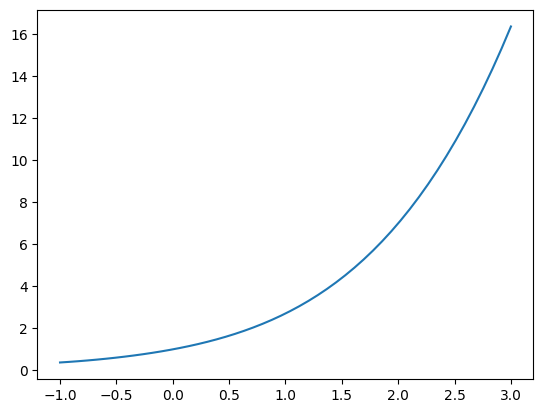

In [5]:
# 尝试作图
plt.plot(x, y)

In [6]:
# 综合以上尝试
def plot_poly_approx(n, x, poly_coef):
    '''
        一次性画出在 x=0 处逼近指数函数 f = exp(x) 不同阶的多项式
    '''
    
    for i in range(n):
        poly_coefficients = poly.Polynomial(poly_coef_exp(i))
        plt.plot(x, poly_coefficients(x), color='blue', alpha=0.1+0.8*i/n)
    
    return

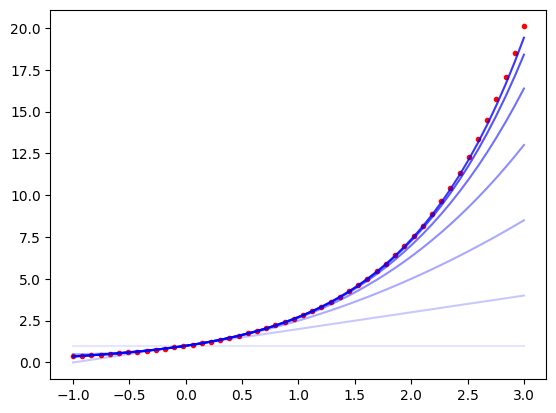

In [7]:
# "真实"的指数函数图像
plt.plot(x, np.exp(x), 'r.')
# 以不同阶多项式逼近的函数图像
plot_poly_approx(7, x, poly_coef_exp)

## Lagrange 插值

Lagrange 插值不仅使用 $x_0$ 处的信息，还使用 $x_1,x_2,\dots,x_n$ 等一共 $(n+1)$ 个点的信息.

为此，所构造的基函数形如 

$$L_k(x)=\prod_{i=0,i\ne k}^n \frac{(x-x_i)}{(x_k-x_i)}$$

它满足 $$L_{k}(x_i) = \begin{cases}
        1\quad\text{当}\;i=k,
        \\
        0\quad\text{当}\;i\ne k.
        \end{cases}\quad i=0,1,\dots,n$$
        
如此，则 Lagrange 插值多项式为 $$P_n(x)=\sum_{k=0}^n f(x_k)L_k(x)$$

### 线性插值

线性插值使用两个点 $x_0,x_1$，构造基函数 $$L_0(x)=\frac{x-x_1}{x_0-x_1},\;\text{和}\;L_1(x)=\frac{x-x_0}{x_1-x_0}$$

插值多项式为 $$P(x)=L_0(x)f(x_0)+L_1(x)f(x_1)$$

In [8]:
import operator
from functools import reduce

def lagrange_basis(xs, i):
    '''
       在点 x_i 计算相应的 Lagrange 基
    '''
    n = len(xs)
    assert i in range(n), '所给下标超出范围'
    
    # 使用高阶函数
    def _basis(x):
        p = [(x - xs[k]) / (xs[i] - xs[k]) for k in range(n) if k != i]
        return reduce(operator.mul, p)
    
    return _basis

In [9]:
# 示例插值节点的 x 坐标
xvalues = [2, 5]
# 示例插值节点的 y 坐标
yvalues = [4, 1]

In [10]:
# L_0(x)
l0 = lagrange_basis(xvalues, 0)
l1 = lagrange_basis(xvalues, 1)

# lagrange_basis 返回的是一个函数，例如
l0

<function __main__.lagrange_basis.<locals>._basis(x)>

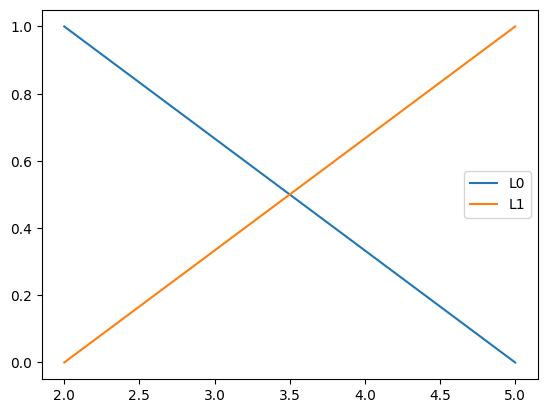

In [11]:
# 为画图作准备
xs = np.linspace(xvalues[0], xvalues[-1], 50)

ys_l0 = [l0(j) for j in xs]
ys_l1 = [l1(j) for j in xs]

# 分别画出在 x_0 和 x_1 处的两个基函数
fig, ax = plt.subplots()
ax1, = ax.plot(xs, ys_l0, label='L0')
ax2, = ax.plot(xs, ys_l1, label='L1')
ax.legend(handles=[ax1, ax2])

In [12]:
def lagrange_interpolate(xs, ys):
    '''
        基函数的线性组合
    '''
    n = len(xs)
    assert len(xs) == len(xs), '所给节点长度不匹配'
    
    # 使用高阶函数
    def _func(x):
        return sum(lagrange_basis(xs, i)(x) * ys[i] for i in range(n))
    
    return _func

In [13]:
# 测试
lagrange_interpolate(xvalues, yvalues)(2)

4.0

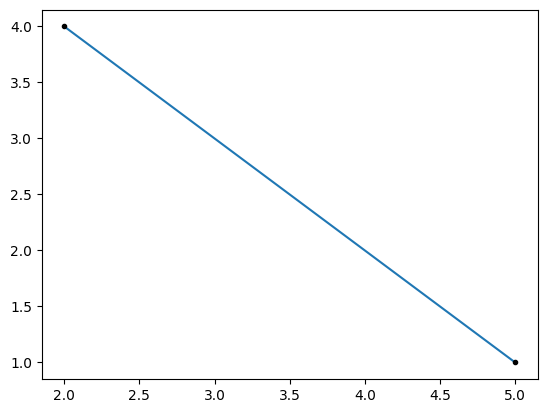

In [14]:
# 利用插值的结果，画出函数图像

xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')